# README's and Predicting Coding Languages

<hr style="border-top:10px groove DarkOrange; margin-top: 2px; margin-bottom: 2px">

In [1]:
# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")

# Standard Imports
import numpy as np
from scipy import stats
import pandas as pd
import os
from scipy.stats import spearmanr
from sklearn import metrics
from random import randint
from typing import Dict, List, Optional, Union, cast
from time import sleep

# Vis Imports
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Modeling Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import sklearn.preprocessing
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# NLP Imports
import unicodedata
import re
import json
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# Custom Module Imports
from env import github_token, github_username
# import acquire
import prepare
import explore_final

<hr style="border-top:10px groove DarkOrange; margin-top: 2px; margin-bottom: 2px">

## Acquire and Prepare

<hr style="border-top:10px groove DarkOrange; margin-top: 2px; margin-bottom: 2px">

- The acquire module web scrapes data from README's on GitHub an saves them to a CSV
- The prepare module cleans, tokenizes, stems, lemmatizes, and removes stopwords in our data.

In [2]:
# Reads the csv into a dataframe
df0 = prepare.pull_data()
# Makes a copy of the dataframe to prepare
original = df0
# Prepares the data for exploration
df = prepare.prepare_article(original)

In [3]:
df.language.value_counts()

JavaScript    40
Python        40
Java          40
C++           39
Name: language, dtype: int64

## Acquire and Prepare Takeaways
- We pulled 40 of the top 4 coding languages README's on GitHubs most forked repositories.
- There was one null we dropped in the C++ coding language.
- We now have 159 rows of data.

<hr style="border-top:10px groove DarkOrange; margin-top: 2px; margin-bottom: 2px">

## Explore

<hr style="border-top:10px groove DarkOrange; margin-top: 2px; margin-bottom: 2px">

In [4]:
# Sepperate the different coding languages into different dataframes
JavaScript_words = df[df.language == 'JavaScript']
Python_words = df[df.language == 'Python']
Java_words = df[df.language == 'Java']
C_plus_plus_words = df[df.language == 'C++']
# Make a list of all words in the lemmatized column
all_words = ' '.join(df.lemmatized).split()

In [5]:
# Making lists of the words for each coding language
JavaScript_words = ' '.join(JavaScript_words.lemmatized).split()
Python_words = ' '.join(Python_words.lemmatized).split()
Java_words = ' '.join(Java_words.lemmatized).split()
C_plus_plus_words = ' '.join(C_plus_plus_words.lemmatized).split()

<hr style="border-top:10px groove DarkOrange; margin-top: 2px; margin-bottom: 2px">

## Q1. What are the most common words across all coding languages?


In [6]:
word_counts = explore_final.q1(JavaScript_words, Python_words, Java_words, C_plus_plus_words, all_words)

In [7]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,javascript,python,java,c_plus_plus
yes,1747,2,1744,0,1
unknown,918,0,918,0,0
data,854,59,681,65,49
python,805,1,752,4,48
library,717,19,527,34,137
use,677,212,243,73,149
apikey,602,2,600,0,0
img,595,63,160,346,26
code,579,127,264,60,128
learning,547,5,500,7,35


## Q1 Takeaways
- The top 10 words across all coding languages are shown in the dataframe above.
- The word yes appears the most commonly and is almost exclusive to python.

<hr style="border-top:10px groove DarkOrange; margin-top: 2px; margin-bottom: 2px">

## Q2. Can we gain any more information from visualizing question 1?

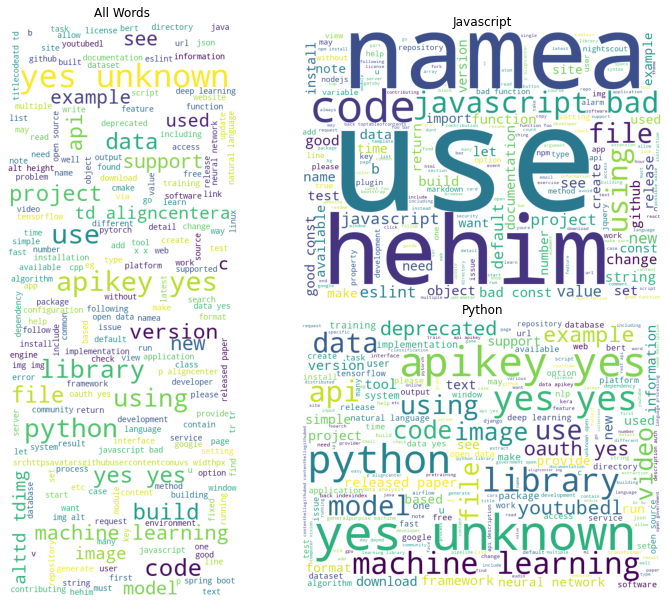

In [9]:
explore_final.q2_word_cloud_1(JavaScript_words, Python_words, Java_words, C_plus_plus_words, all_words)

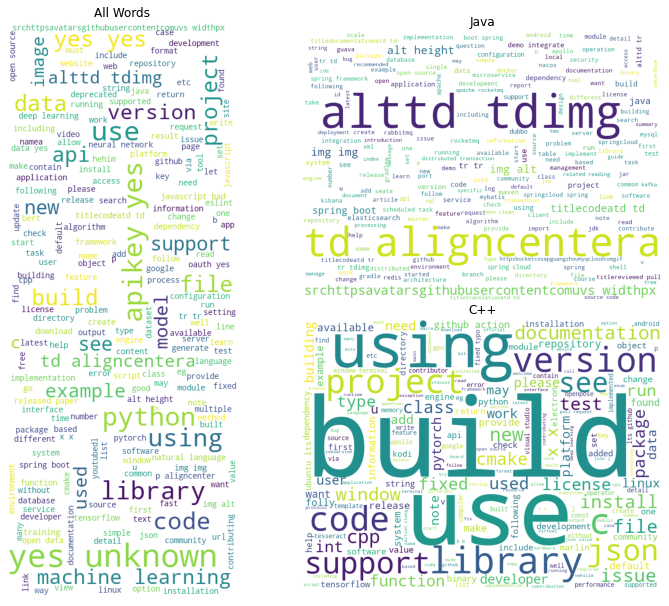

In [10]:
explore_final.q2_word_cloud_2(JavaScript_words, Python_words, Java_words, C_plus_plus_words, all_words)

## Q2 Takeaways
- 